In [1]:
# Compara la serie de tiempo del onset
# y withdrawal para CPC y CHIRPS

import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Permite ajustar los valores de todas las gráficas
#params = {"ytick.color" : "w",
#          "xtick.color" : "w",
#          "axes.labelcolor" : "w",
#          "axes.edgecolor" : "w",
#          "text.color": "w"}
#plt.rcParams.update(params)

In [4]:
# Rutas de archivos.
path_d = "../results/onset/"
path_r = "../results/onset/graficas/"

# Si no existe la carpeta, la crea.
if not os.path.exists(path_r):
    os.mkdir(path_r)

# Serie de tiempo de CPC.
CPC = pd.read_csv(path_d + "onset_CPC.csv",
    index_col = "Año")

# Se selecciona a partir de 1981 para homologar con CHIRPS.
CPC = CPC.iloc[2:]
# Se convierten las fechas a días julianos.
CPC["Cuenca - Onset"] = CPC["Cuenca - Onset"].apply(
    lambda x: pd.to_datetime(x))
CPC["Cuenca - Onset"] = CPC["Cuenca - Onset"].apply(
    lambda x: x.dayofyear)
CPC["Cuenca - Withdrawal"] = CPC["Cuenca - Withdrawal"].apply(
    lambda x: pd.to_datetime(x))
CPC["Cuenca - Withdrawal"] = CPC["Cuenca - Withdrawal"].apply(
    lambda x: x.dayofyear)

# Serie de tiempo de CHIRPS.
CHIRPS = pd.read_csv(path_d + "onset_CHIRPS.csv",
    index_col = "Año")

# Se convierten las fechas a días julianos.
CHIRPS["Cuenca - Onset"] = CHIRPS["Cuenca - Onset"].apply(
    lambda x: pd.to_datetime(x))
CHIRPS["Cuenca - Onset"] = CHIRPS["Cuenca - Onset"].apply(
    lambda x: x.dayofyear)
CHIRPS["Cuenca - Withdrawal"] = CHIRPS["Cuenca - Withdrawal"].apply(
    lambda x: pd.to_datetime(x))
CHIRPS["Cuenca - Withdrawal"] = CHIRPS["Cuenca - Withdrawal"].apply(
    lambda x: x.dayofyear)

Onset correlation: 0.881
Withdrawal correlation: 0.680


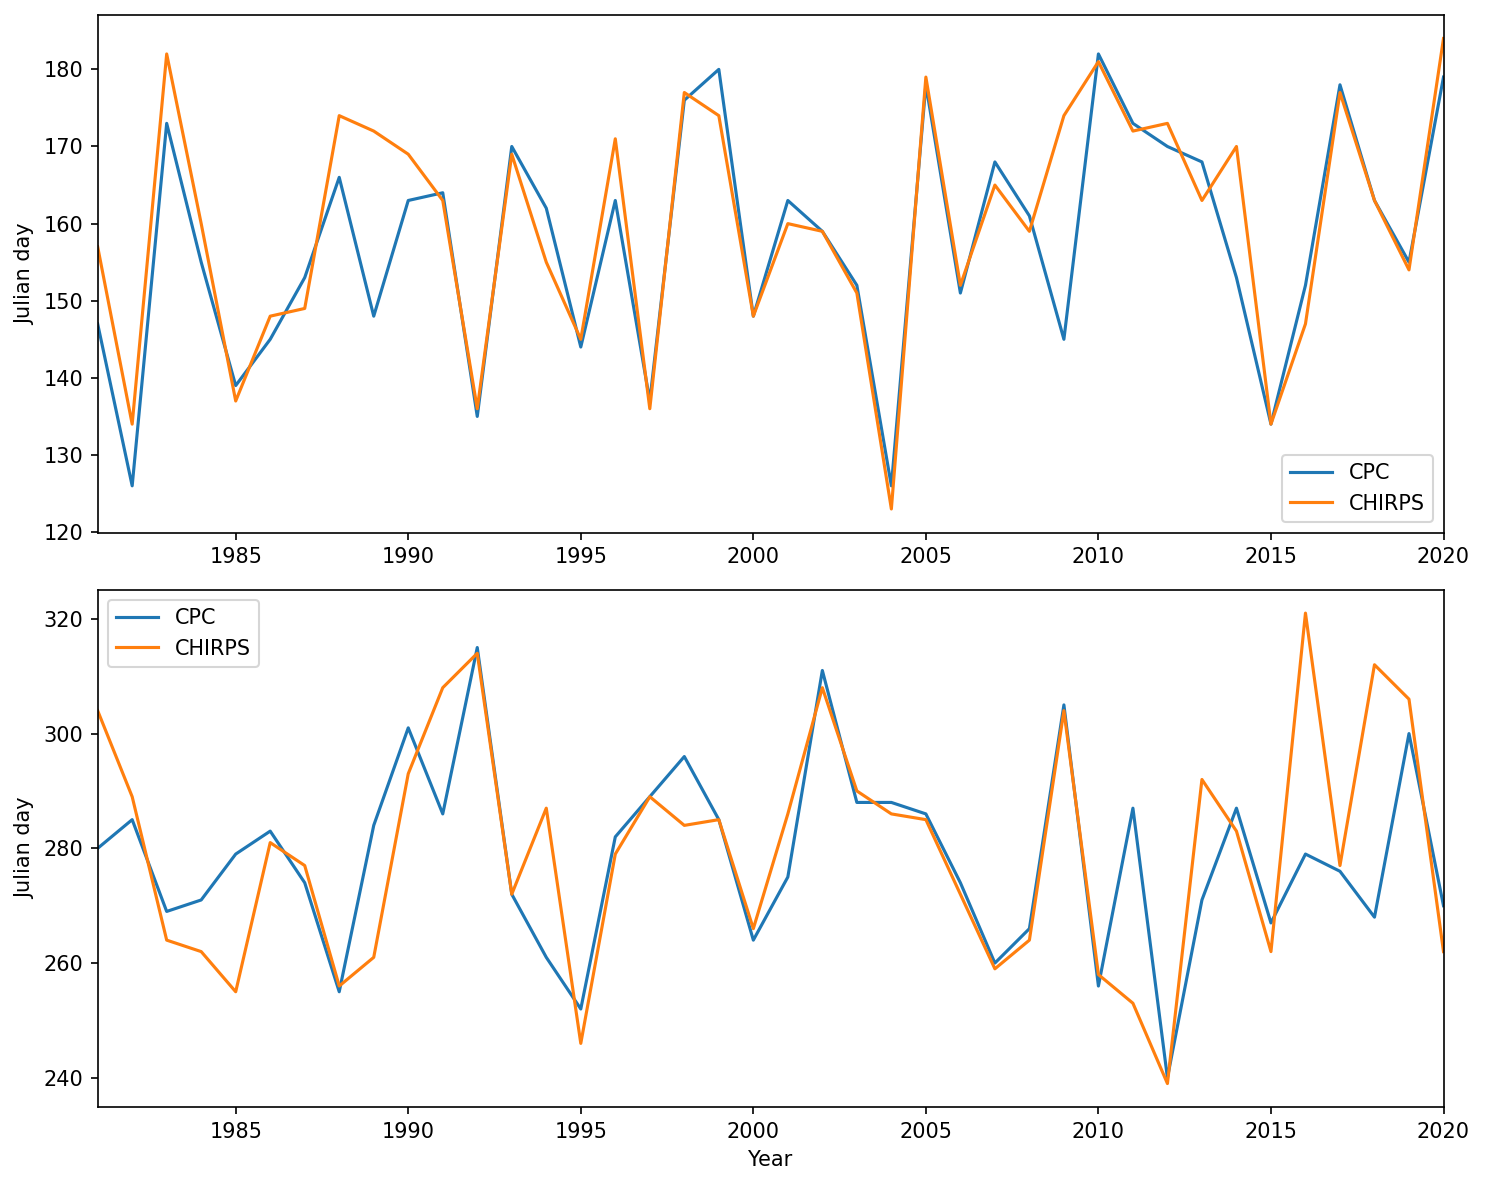

In [8]:
# Graficamos.
fig, axes = plt.subplots(2)
fig.set_facecolor("w")
fig.set_size_inches(10, 8)
fig.set_dpi(150)

CPC["Cuenca - Onset"].plot(ax = axes[0])
CHIRPS["Cuenca - Onset"].plot(ax = axes[0])

CPC["Cuenca - Withdrawal"].plot(ax = axes[1])
CHIRPS["Cuenca - Withdrawal"].plot(ax = axes[1])

for ax in axes:
    ax.set_ylabel("Julian day")
    ax.legend( ["CPC", "CHIRPS"] )
    ax.set_xlim(1981, 2020)
axes[0].set_xlabel("")
axes[1].set_xlabel("Year")

# Correlaciones de las series.
corr = []
corr.append( CPC["Cuenca - Onset"].corr(
    CHIRPS["Cuenca - Onset"] ) )
corr.append( CPC["Cuenca - Withdrawal"].corr(
    CHIRPS["Cuenca - Withdrawal"] ) )
print(f"Onset correlation: {corr[0]:.3f}")
print(f"Withdrawal correlation: {corr[1]:.3f}")

# Separación adecuada entre gráficas.
fig.tight_layout()

# Guardamos el archivo.
fig.savefig(path_r + "comparacion_2.png")